In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data # 인풋으로 사용할 데이터
y = wine.target # 아웃풋, target으로 사용할 데이터
col_names = wine.feature_names # 인풋으로 사용할 데이터의 컬럼별 이름들

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### **Q3. 인풋으로 사용할 데이터( x )의 row 수와 column 수를 확인하시기 바랍니다.**
---

In [3]:
# 인풋으로 x의 row 수와 column 수를 확인
n_r, n_c = x.shape
print(f"로우 수 : {n_r}")
print(f"컬럼 수 : {n_c}")

로우 수 : 178
컬럼 수 : 13


In [4]:
# 데이터를 트레이닝셋 / Valid셋으로 분할
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2021, stratify = y)

In [5]:
#  Decision Tree 모델 - depth 1 to 16
from sklearn.tree import DecisionTreeClassifier

trees = []
for depth in range(1, 16) :
    tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 10, random_state=2021)
    tree.fit(x_train, y_train)
    trees.append(tree)

In [6]:
# 모델들의 성능
accs = []
for depth in range(1, 16) :
    idx = depth - 1
    tree = trees[idx]
    acc = tree.score(x_valid, y_valid)
    accs.append(acc)

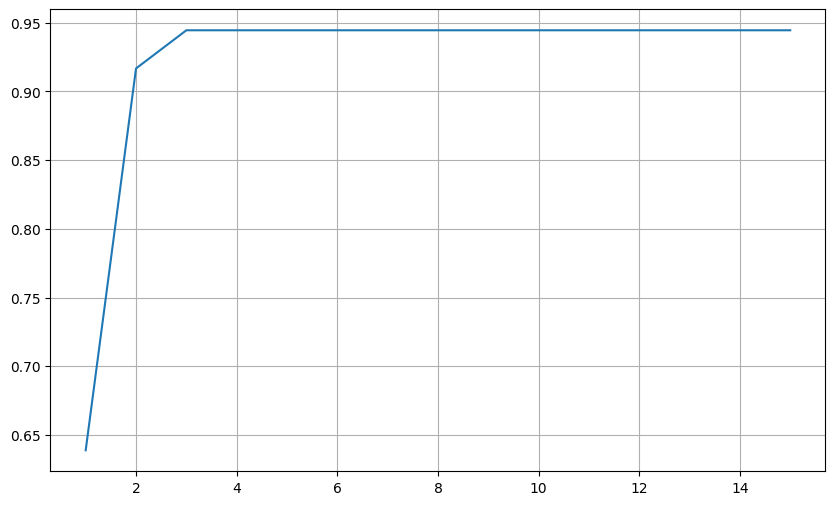

depth = 3 선택


In [8]:
# 모델들의 성능 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1,16), accs)
plt.grid()
plt.show()
print('depth = 3 선택')

In [9]:
# Decision Tree 선택된 depth에서 모델들을 학습 - min_samples_leaf from 5 to 15
from sklearn.tree import DecisionTreeClassifier

trees = []
for min_sample in range(1, 16) :
    tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = min_sample, random_state=2021)
    tree.fit(x_train, y_train)
    trees.append(tree)

In [10]:
# Decision Tree 모델들의 성능
accs = []
for min_sample in range(1, 16) :
    idx = min_sample - 1
    tree = trees[idx]
    acc = tree.score(x_valid, y_valid)
    accs.append(acc)

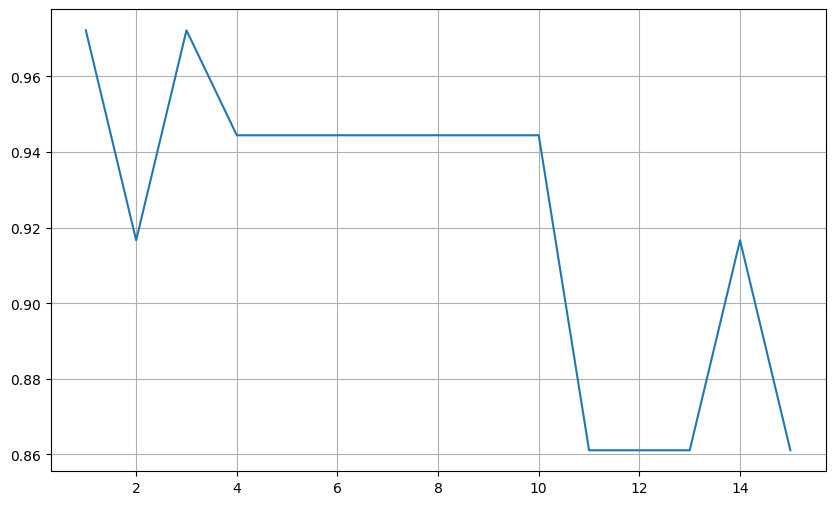

최소 샘플 수 = 1 선택


In [11]:
# accuracy를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1,16), accs)
plt.grid()
plt.show()
print('최소 샘플 수 = 1 선택')
best_tree = trees[0]

### **Q11. Q10번에서 시각화한 트리의 relative feature importance를 시각화 하시기 바랍니다.**
* **
- 수평 bar plot을 이용한다.
- 각 변수의 이름은 col_names를 활용한다.
---

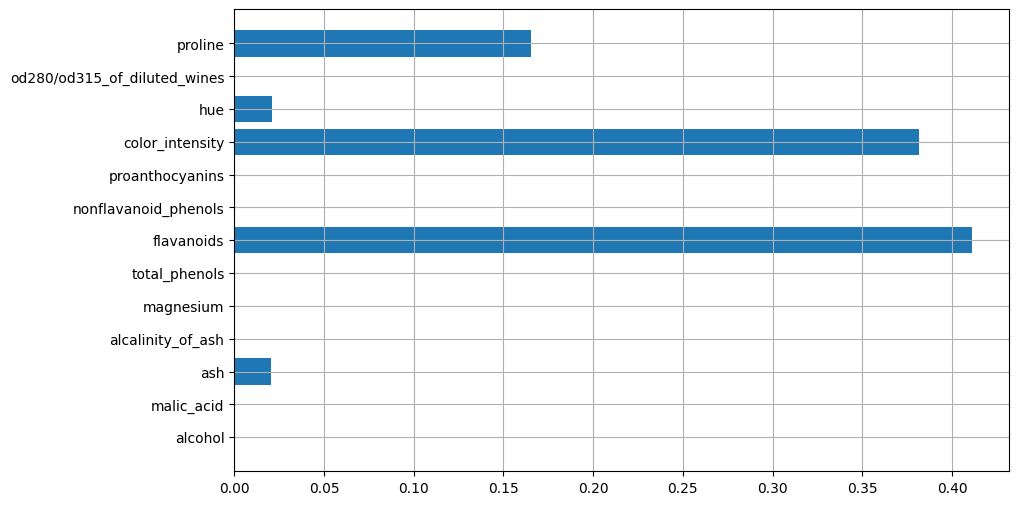

In [12]:
# relative feature importance

plt.figure(figsize=(10, 6))
plt.barh(y=col_names, width=best_tree.feature_importances_)
plt.grid()
plt.show()

In [14]:
# accuracy를 출력
print(f"테스트셋 위에서의 accuracy : {best_tree.score(x_valid, y_valid)*100:.2f}%")

테스트셋 위에서의 accuracy : 97.22%


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
keras.backend.clear_session()

model = Sequential()
model.add(Dense(32, activation='swish', input_shape=(13,)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='swish'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,
                    verbose=0,validation_data=(x_valid, y_valid),callbacks=[es])

Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping


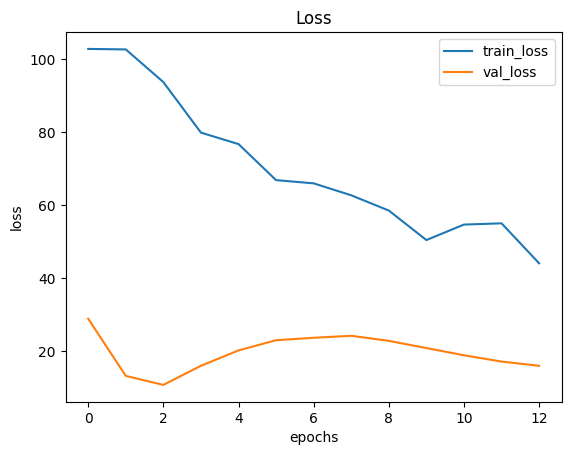

In [20]:
# 여기에 답안코드를 작성하세요
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()